# WEEK 2 || Assignment
Tasks to be done:
1. A data cleaning pipeline - you will be given the training data beforehand and all the data cleaning process should be ecompassed in this function.Create the function is such a way that it only takes the input of the name of the file and it outputs a cleaned and ready to work dataframe
2. An ML model trainer function-a function which when given data in form of x,y returns a trained model
3. An Ml model tester function- a function which when given test data (x) and actual predictions(y) returns the accuracy and if possible prints a plot of confusion matrix



Note: more information about the data is avaialble [here...](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

## Task 1 || Analysis:
First we need to encounter common Data Cleaning problems
-  Data format
-  Missing data
-  Proper column Names, Case, Data, DataTypes

Note:  We need to create a pipeline to solve all the issues of Data Cleaning, above listed are few common problems (may vary for each dataset). So we'll have [look](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) at data first.
  

In [ ]:
pip install turicreate

In [ ]:
# can add all the data_visualization functions here, and invoke the function in main()
# for visulaization we're using turicreate.SFrame
import turicreate
def data_visualization(dataframe):
    
    # basic data analysis
    print('The shape of dataset in terms of rows and cols:\n', dataframe.shape)
    print('*'*100)
    print('Have a look at first 10 rows of the dataset: \n\n', dataframe.head(10))
    print('*'*100)
    print('Description about the dataset: \n\n', dataframe.describe())
    print('*'*100)
    print('Description about the dataset including the Categorical variables: \n\n', dataframe.describe(include = 'all'))
    print('*'*100)
    print('Dataset info: \n\n',dataframe.info())
    print('*'*100)
    print('Lets see the what are the output values wrt thier count: \n\n', dataframe['SUBSCRIBED'].value_counts())
    print('*'*100)
    
    # univariate analysis
    sf = turicreate.SFrame(dataframe)
    print(sf.show())
    print(sf.plot())
    
    

In [ ]:
def task1():
    
    # checking the data format to be supported, its already in specified format
    input_data = input('Enter the filename/path name:  ')
    data = pd.read_csv(input_data)
    #print('The dataset is in appropriate format \n')
    
    print('This is TASK 1 \n', '-'*120)
    # checking for missing values, no missing values available
    # missing values are represented in the form of 'unknown' value in some of the columns
    count = data.isnull().sum().sum()  # we're calculating the total count of missing values
    if count == 0:
        print('')
        #print('The dataset doesnt have any missing values\n')
    else:
        impute_missing_values(data)
    
    
    # checking for valid case(either be in upper case/ lower case)
    # for better look, making all col names to be in uppercase
    data.columns = [x.upper() for x in data.columns]
    #print(data)
    #print('Column names are changed to UpperCase\n')
    
    
    # checking for valid column names, changing them to interpret more meaning full insights
    # Note: this task is done column by column (manually), as these column names are different for each dataset (problem)
    data = data.rename(columns = {'MARITAL': 'MARITAL_STATUS','DEFAULT': 'CREDIT', 'PDAYS':'CONTACTED_BEFORE',
                                    'PREVIOUS':'PREVIOUS_CAMPAIGN', 'POUTCOME':'PREVIOUS_CAMPAIGN_OUTCOME', 'Y':'SUBSCRIBED'})
    #print(data)
    #print('Column names are changed with meaningful names\n')
    
    # checking for valid datatypes
        # we need to check for each variable available in the dataset
    # as we priorly know them we're checking for dependent and independent variables
   
        
    #print('The dataset has approptiate datatypes wrt to the UCI repo\n')
    #print(data)

    data["MONTH"].replace({"jan": 1,"feb": 2,"mar": 3,"apr": 4, "may": 5, "jun": 6,"jul": 7,"aug": 8,"sep": 9,"oct": 10,"nov": 11,"dec": 12,}, inplace=True)
    
    
    # contacted_before shouldn't exceed 999 limit, if so delete it
    # as we dont have then, no effect can be seen
    if data['CONTACTED_BEFORE'].max() <= 999:
        print('')
    else:
        data = data.drop(data[data['CONTACTED_BEFORE'].max() > 999].index)
        

    
    # As of now, we only checked the outlayer of data, now we need to check the actual data present in each row is valid or not
    # we can observe many categorical fields are filled with values 'unknown' which can be treated as missing value
    # why to treat as missing value?
    # If we observe the dataset from UCL repo, its clearly mentioned what are the accepted values for each varibale in the dataset, so we considered it as missing value
    
    # Categorical variables missing values can be imputed either 'MODE'
    
    # to do this task first we need to find the independent/ depenedent variables which have 'unknown' as value within them
    col_names = list(data.columns)
    new = []
    for col in col_names:
        if (data[col] == 'unknown').any() or (data[col] == 'nan').any() or (data[col] == 'na').any():
            new.append(col)
    #print(new)
    
    # imputing them with appropriate values
    # Job, Education = other, Contact = cellular, previous campaign outcome = unknown, mode(), random (success, failure ,other)  
    
    for col in new:
        if (data[col] == data['JOB']).any() or (data[col] == data['EDUCATION']).any():
            data[col] = data[col].replace({'unknown' : 'Other' })
        elif (data[col] == data['CONTACT']).any():
            data['CONTACT'] = data['CONTACT'].replace({'unknown' : 'cellular'})
        elif (data[col] == data['PREVIOUS_CAMPAIGN_OUTCOME']).any():
            #options = ['success', 'failure', 'other']
            data['PREVIOUS_CAMPAIGN_OUTCOME'] = data['PREVIOUS_CAMPAIGN_OUTCOME'].replace({'unknown':'other'})
    
    #print(data['JOB'].value_counts())
    #print(data['EDUCATION'].value_counts())
    #print(data['CONTACT'].value_counts())
    #print(data['PREVIOUS_CAMPAIGN_OUTCOME'].value_counts())
    
    #print('The Data Cleaning Process is done. Saving the dataset as cleaned_bank_full.csv')
    
    data.to_csv('cleaned_bank_full.csv', encoding = 'utf-8')
    dataframe = pd.read_csv('cleaned_bank_full.csv')
    dataframe = dataframe.drop(dataframe.columns[0], axis = 1)
    #print(dataframe.shape)
    #print(dataframe.head(10))
    #print(dataframe.tail(10))
    
    
    # Data visualization refers to techniques used to communicate insights from data through visual representation. 
    # Its main goal is to distill large datasets into visual graphics to allow for easy understanding 
    #of complex relationships within the data.
    data_visualization(dataframe)
    return dataframe

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

def pre_processing(dataframe):
  y = dataframe['SUBSCRIBED']
  #dataframe = dataframe.drop(['SUBSCRIBED'])
  dataframe = pd.get_dummies(dataframe)
  print('As we imposed dummies to change categorical to numerical the shape of dataframe is: ',dataframe.shape)
  corr = dataframe.corr()
  print('Correlation matrix with heatmap')
  top_features = corr.index
  plt.figure(figsize=(20,20))
  #plot heat map
  g=sns.heatmap(dataframe[top_features].corr(),annot=True,cmap="RdYlGn")
  
  # from the correlation matrix heatmap, we have choosen these features
  #choosen_features = ['AGE', 'DURATION', 'CONTACTED_BEFORE', 'PREVIOUS_CAMPAIGN','JOB', 'MARITAL_STATUS', 'EDUCATION', 'HOUSING', 'CONTACT', 'PREVIOUS_CAMPAIGN_OUTCOME']
  
  choosen_features = ['AGE', 'DURATION',
       'CONTACTED_BEFORE', 'PREVIOUS_CAMPAIGN', 'JOB_Other', 'JOB_admin.',
       'JOB_blue-collar', 'JOB_entrepreneur', 'JOB_housemaid',
       'JOB_management', 'JOB_retired', 'JOB_self-employed', 'JOB_services',
       'JOB_student', 'JOB_technician', 'JOB_unemployed',
       'MARITAL_STATUS_divorced', 'MARITAL_STATUS_married',
       'MARITAL_STATUS_single', 'EDUCATION_Other', 'EDUCATION_primary',
       'EDUCATION_secondary', 'EDUCATION_tertiary', 'CREDIT_no', 'CREDIT_yes',
       'HOUSING_no', 'HOUSING_yes', 'CONTACT_cellular',
       'CONTACT_telephone', 'PREVIOUS_CAMPAIGN_OUTCOME_failure',
       'PREVIOUS_CAMPAIGN_OUTCOME_other', 'PREVIOUS_CAMPAIGN_OUTCOME_success']

  x = dataframe[choosen_features]    
  #y = dataframe['SUBSCRIBED']
  print('All independent features shape:', x.shape)
  print('Dependent features shpae:', y.shape)
  x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)
  scaler = StandardScaler()
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.fit_transform(x_test)
  print('x_train shape:', x_train.shape)
  print('y_train shape:', y_train.shape)
  print('x_test shape:', x_test.shape)
  print('y_test shape:', y_test.shape)
    
  return x_train, y_train, x_test, y_test

## Task 2 || Training model:
In this task we create a funcion, which works as traning model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


def task2(x_train, y_train):
    print('\n \n This is TASK 2 \n', '-'*120)
    #print(dataframe.shape)
    

    print('*'*45, 'Algorithms', '*'*45, '\n 1. Logistic Regression \n 2. KNN \n 3. SVM \n 4. Decision Tress \n 5. Random Forests')
    algo = int(input("Choose the algorithm's respective no: "))

    if algo == 1:
      #Logistic_Regression_model(x_train, y_train)
      lr = LogisticRegression()
      lr.fit(x_train, y_train)
      print('Successfully trained the model using LogisticRegression')
      return lr

    elif algo == 2:          
      #KNeighbors_Classifer_model(x_train, y_train, k)
      k = int(np.sqrt(x_train.shape[0]))
      knn = KNeighborsClassifier(n_neighbors = k)
      knn.fit(x_train, y_train)
      print('Successfully trained the model using KNN')
      return knn
            
    elif algo == 3:
      #Support_Vector_Classifier_model(x_train, y_train)
      svm = SVC(kernel = 'linear')   
      svm.fit(x_train, y_train)
      print('Successfully trained the model using SVM')
      return svm

    elif algo == 4:
      #Decision_Tree_Classifier_model(x_train, y_train, depth, features, samples)
      dtree = DecisionTreeClassifier(max_depth = 3)
      dtree.fit(x_train, y_train)
      print('Successfully trained the model using Decision trees')
      return dtree

    elif algo == 5:
       #Random_Forest_Classifier_model(x_train, y_train, estimators, jobs, features, samples)
       rfc = RandomForestClassifier()
       rfc.fit(x_train, y_train)
       print('Successfully trained the model using Random forest')
       return rfc

## Task 3 || Testing:
In this task we create a funcion, which works as traning model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
def task3(model, x_test, y_test):
    print('\n \n This is TASK 3 \n', '-'*120)
    predictions = model.predict(x_test)
    # y_test  actual labels

    print('The accuracy score for the model used is:', accuracy_score(y_test, predictions))
    print('Confusion matrix:', confusion_matrix(y_test, predictions, labels = None))

    

Enter the filename/path name:  sample_data/bank-full.csv
This is TASK 1 
 ------------------------------------------------------------------------------------------------------------------------




/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


The shape of dataset in terms of rows and cols:
 (45211, 17)
****************************************************************************************************
Have a look at first 10 rows of the dataset: 

    AGE           JOB  ... PREVIOUS_CAMPAIGN_OUTCOME SUBSCRIBED
0   58    management  ...                     other         no
1   44    technician  ...                     other         no
2   33  entrepreneur  ...                     other         no
3   47   blue-collar  ...                     other         no
4   33         Other  ...                     other         no
5   35    management  ...                     other         no
6   28    management  ...                     other         no
7   42  entrepreneur  ...                     other         no
8   58       retired  ...                     other         no
9   43    technician  ...                     other         no

[10 rows x 17 columns]
*************************************************************************

Materializing SFrame

None


Materializing SFrame

As we imposed dummies to change categorical to numerical the shape of dataframe is:  (45211, 40)
Correlation matrix with heatmap
All independent features shape: (45211, 32)
Dependent features shpae: (45211,)
x_train shape: (36168, 32)
y_train shape: (36168,)
x_test shape: (9043, 32)
y_test shape: (9043,)
This is TASK 2 
 ------------------------------------------------------------------------------------------------------------------------
********************************************* Algorithms ********************************************* 
 1. Logistic Regression 
 2. KNN 
 3. SVM 
 4. Decision Tress 
 5. Random Forests
Choose the algorithm's respective no: 5
Successfully trained the model using Random forest
This is TASK 3 
 ------------------------------------------------------------------------------------------------------------------------
The accuracy score for the model used is: 0.887316156142873
Confusion matrix: [[7617  363]
 [ 656  407]]


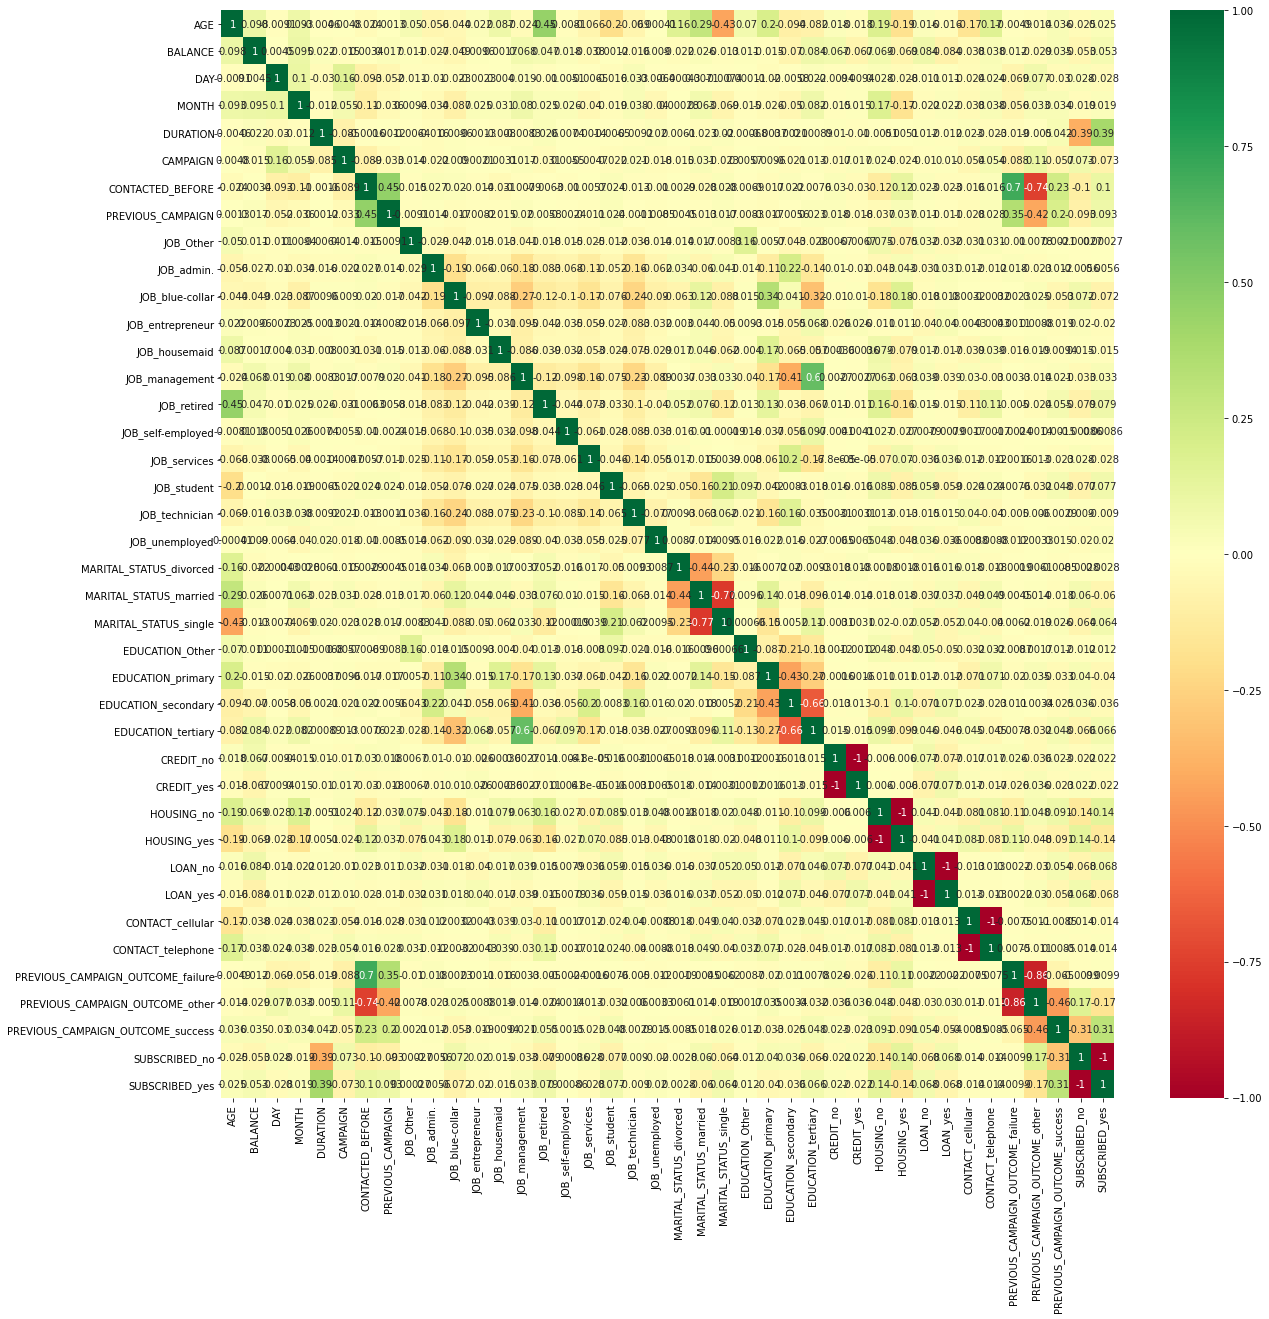

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib inline in above code snippet allows us to view our graphs in jupyter notebook itself


# main function which calls all the three tasks
if __name__ == "__main__":
    dataframe = task1()
    x_train, y_train, x_test, y_test = pre_processing(dataframe)
    model = task2(x_train, y_train)
    task3(model, x_test, y_test)
    
#path name : sample_data/bank-full.csv